In [52]:
import math
import geopandas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [2]:
entire_df = pd.read_csv('/home/adwait_bhope/Desktop/Files/Hackathons/ASEAN India Hackathon 2020/data/playing around/Coast NOAA/AIS_2020_01_01.csv')

print('Datapoints:', len(entire_df))
print('Unique ships:', len(entire_df['MMSI'].unique()))

Datapoints: 7033455
Unique ships: 14021


In [3]:
print('Sample data')
entire_df.head()

Sample data


,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
0,367149340,2020-01-01T00:00:00,29.96476,-90.02724,1.3,10.0,16.0,SYDNEE TAYLOR,NaN,WDD4807,31.0,0.0,26.0,9.0,NaN,31.0,B
1,367687520,2020-01-01T00:00:00,30.20558,-91.03578,10.7,124.9,130.0,CHIPPEWA,NaN,WDI3361,31.0,0.0,22.0,NaN,NaN,NaN,B
2,367368170,2020-01-01T00:00:03,47.53785,-122.32833,0.6,46.5,141.0,SONJA H,NaN,WDE5536,31.0,0.0,18.0,6.0,NaN,32.0,B
3,367007980,2020-01-01T00:00:05,37.95154,-121.32682,0.0,-49.6,511.0,ANGIE M BRUSCO,IMO5111359,WDC3446,31.0,0.0,28.0,7.0,3.4,NaN,B
4,367538940,2020-01-01T00:00:05,30.00258,-93.22608,3.1,168.0,511.0,RITA ANN,NaN,WDG4670,31.0,0.0,21.0,NaN,NaN,NaN,B


In [3]:
fishing_ships = entire_df.loc[entire_df['VesselType'] == 30]

print('Fishing datapoints:', len(fishing_ships))
print('Unique fishing ships:', len(fishing_ships['MMSI'].unique()))

Fishing datapoints: 528883
Unique fishing ships: 1136


In [4]:
fishing_ships.to_csv('AIS_2020_01_01_Fishing.csv')

In [46]:
other_ships = entire_df.loc[entire_df['VesselType'] != 30]

print('Other datapoints:', len(other_ships))
print('Unique other ships:', len(other_ships['MMSI'].unique()))

Other datapoints: 6504572
Unique other ships: 12885


In [42]:
llat = math.floor(min(fishing_ships['LAT']))
ulat = math.ceil(max(fishing_ships['LAT']))

llon = math.floor(min(fishing_ships['LON']))
ulon = math.ceil(max(fishing_ships['LON']))

print(f'Lat range: ({llat}, {ulat})')
print(f'Lon range: ({llon}, {ulon})')

Lat range: (19, 62)
Lon range: (-179, -67)


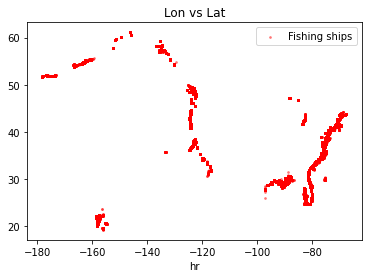

In [51]:
lat_array = fishing_ships['LAT']
lon_array = fishing_ships['LON']
plt.figure()
plt.scatter(lon_array, lat_array, c='red', s=np.pi, alpha=0.4, label='Fishing ships')
plt.title("Lon vs Lat"), plt.xlabel('hr')
plt.legend()

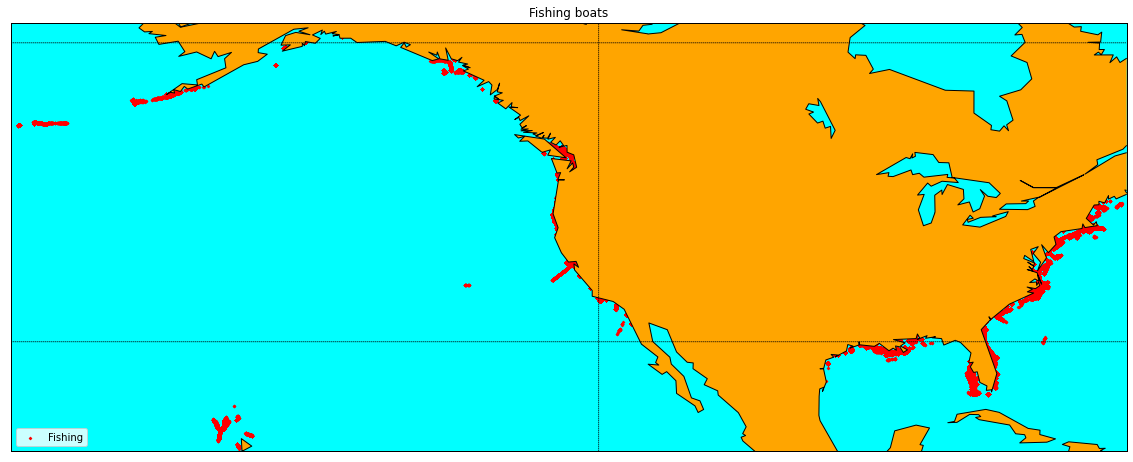

In [43]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.

plt.figure(figsize=(20, 20))

m = Basemap(projection='cyl',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
m.fillcontinents(color='orange',lake_color='aqua')

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lat_array = fishing_ships['LAT']
lon_array = fishing_ships['LON']
x, y = m(lon_array, lat_array)
m.scatter(x, y, color='red', label='Fishing', marker='D', s=np.pi)

plt.title("Fishing boats")
plt.legend()
plt.show()

# Download the Map
# plt.savefig("ExampleMap.png", dpi=300)

In [128]:
fishing_mmsis = fishing_ships['MMSI'].unique()
ship_x_id = fishing_mmsis[0]
# ship_y_id = fishing_mmsis[350]
print(ship_x_id)

ship_x = fishing_ships[fishing_ships['MMSI'] == ship_x_id]
# ship_y = fishing_ships[fishing_ships['MMSI'] == ship_y_id]

ship_x

367320010


,MMSI,BaseDateTime,LAT,LON,SOG,COG,Heading,VesselName,IMO,CallSign,VesselType,Status,Length,Width,Draft,Cargo,TranscieverClass
10,367320010,2020-01-01T00:00:01,43.75206,-124.23319,0.9,31.8,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
9578,367320010,2020-01-01T00:01:29,43.75243,-124.23282,2.1,29.1,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
44235,367320010,2020-01-01T00:09:57,43.74982,-124.23392,5.3,158.4,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
45057,367320010,2020-01-01T00:02:30,43.75263,-124.23287,1.4,-180.9,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
53345,367320010,2020-01-01T00:08:28,43.75104,-124.23368,4.1,182.6,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7000557,367320010,2020-01-01T23:05:53,43.34561,-124.32144,0.1,-84.2,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
7003333,367320010,2020-01-01T23:08:53,43.34561,-124.32142,0.1,-84.2,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
7012025,367320010,2020-01-01T23:23:55,43.34563,-124.32142,0.0,58.9,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B
7018002,367320010,2020-01-01T23:38:55,43.34561,-124.32142,0.1,61.8,511.0,GALWAY BAY,IMO0000000,WB06953,30.0,NaN,22.0,7.0,NaN,NaN,B


In [129]:
# llat = math.floor(min(min(ship_x['LAT']), min(ship_y['LAT'])))
# ulat = math.ceil(max(max(ship_x['LAT']), max(ship_y['LAT'])))

# llon = math.floor(min(min(ship_x['LON']), min(ship_y['LON'])))
# ulon = math.ceil(max(max(ship_x['LON']), max(ship_y['LON'])))

llat = math.floor(min(ship_x['LAT']))
ulat = math.ceil(max(ship_x['LAT']))

llon = math.floor(min(ship_x['LON']))
ulon = math.ceil(max(ship_x['LON']))

print(f'Lat range: ({llat}, {ulat})')
print(f'Lon range: ({llon}, {ulon})')

Lat range: (43, 44)
Lon range: (-125, -124)


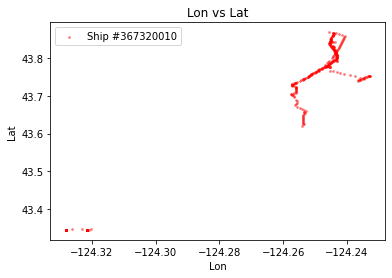

In [130]:
xlat_array, xlon_array = ship_x['LAT'], ship_x['LON']
ylat_array, ylon_array = ship_y['LAT'], ship_y['LON']
 
plt.figure()
plt.scatter(xlon_array, xlat_array, c='red', s=np.pi, alpha=0.4, label=f'Ship #{ship_x_id}')
# plt.scatter(ylon_array, ylat_array, c='blue', s=np.pi, alpha=0.4, label=f'Ship #{ship_x_id}')
plt.title("Lon vs Lat"), plt.xlabel('Lon'), plt.ylabel('Lat')
plt.legend()

No handles with labels found to put in legend.


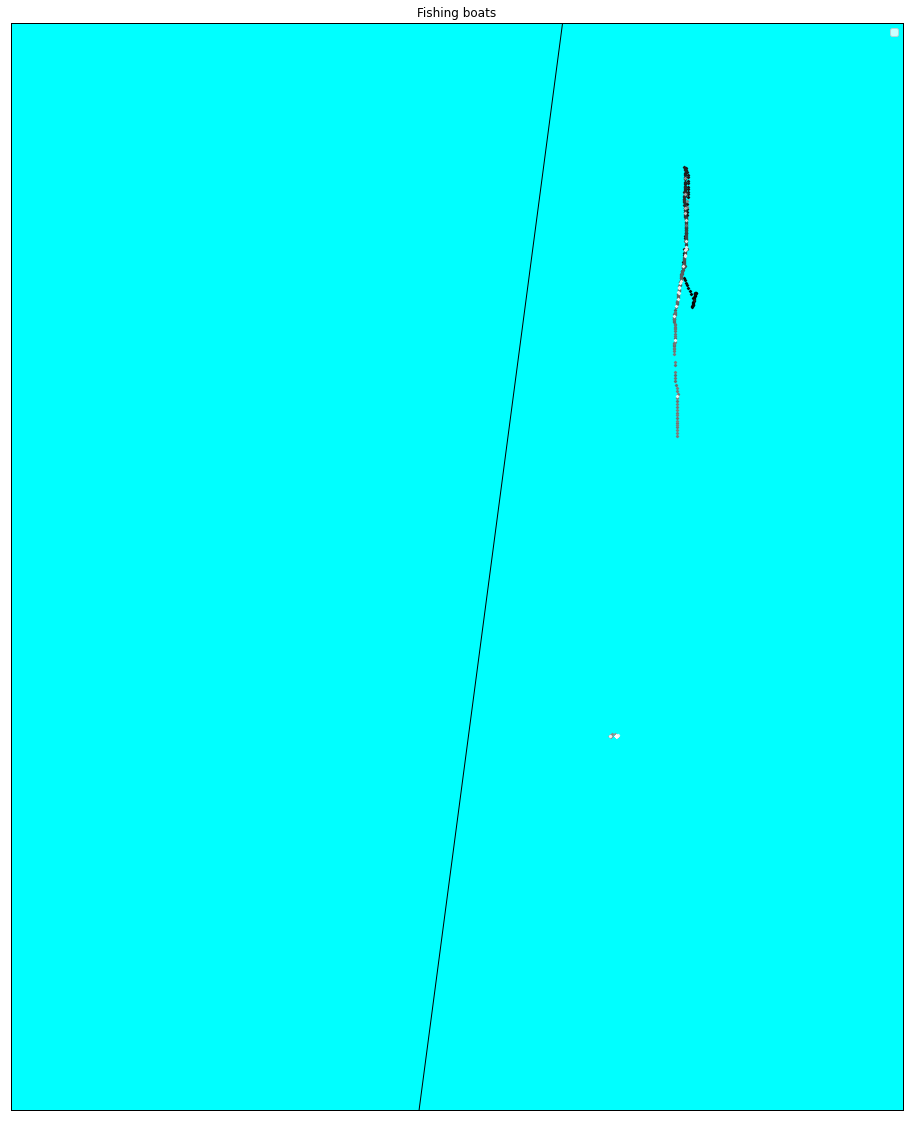

In [106]:
# llcrnrlat,llcrnrlon,urcrnrlat,urcrnrlon
# are the lat/lon values of the lower left and upper right corners
# of the map.
# resolution = 'c' means use crude resolution coastlines.

plt.figure(figsize=(20, 20))

m = Basemap(projection='mill',llcrnrlat=llat,urcrnrlat=ulat,\
            llcrnrlon=llon,urcrnrlon=ulon,resolution='c')
m.drawcoastlines()
# m.fillcontinents(color='orange',lake_color='aqua')

# draw parallels and meridians.
m.drawparallels(np.arange(-90.,91.,30.))
m.drawmeridians(np.arange(-180.,181.,60.))
m.drawmapboundary(fill_color='aqua')

lat_array = ship_x['LAT']
lon_array = ship_x['LON']
total = len(lat_array)
for i, pos in enumerate(zip(lon_array, lat_array)):
    color_value = math.floor(np.interp(i, [0, total], [0, 255]))
    color_value = hex(color_value).split('x')[-1].upper()
    if len(color_value) == 1:
        color_value = '0' + color_value
    
    color_value = '#' + (3 * color_value)
    x, y = pos
    x, y = m(x, y)
    m.scatter(x, y, color=color_value, marker='D', s=math.pi)
    
plt.title("Fishing boats")
plt.legend()
plt.show()

# Download the Map
# plt.savefig("ExampleMap.png", dpi=300)